# Taxi project

## 0.0 Import libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 0.1 Import Data

* data - https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
* data dict - https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf


In [8]:
January_24_file_path = '/Users/mayarat/taxi project/yellow_tripdata_2024-01.csv'
taxi_data = pd.read_csv(January_24_file_path, low_memory=False)

In [9]:
print(taxi_data.shape)
taxi_data.head()

(2964624, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-13 03:18:09.000000,2024-01-13 03:24:37.000000,1,2.31,1,N,48,68,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0
1,2,2024-01-13 03:52:58.000000,2024-01-13 04:01:18.000000,1,2.61,1,N,231,164,1,13.5,1.0,0.5,2.00,0.0,1.0,20.50,2.5,0
2,2,2024-01-13 03:26:02.000000,2024-01-13 03:34:43.000000,1,1.79,1,N,90,233,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0
3,2,2024-01-13 03:53:44.000000,2024-01-13 04:10:56.000000,1,6.58,1,N,141,244,1,27.5,1.0,0.5,6.50,0.0,1.0,39.00,2.5,0
4,2,2024-01-13 02:58:28.000000,2024-01-13 03:14:33.000000,1,3.40,1,N,79,246,1,18.4,1.0,0.5,4.68,0.0,1.0,28.08,2.5,0


# 1. Data Exploring
Understanding our features - right now we have 19

In [10]:
taxi_data.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


### We are going to delete - 
* VendorID
* store_and_fwd_flag
* fare_amount, mta_tax, tip_amount, tolls_amount and extra - we care only about the total amount which is the sum 
* congestion_surcharge 
* Airport_fee

those do not affect (or already counted) the total payment

In [12]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID',
       'DOLocationID', 'payment_type',  'total_amount']]

In [13]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-13 03:18:09.000000,2024-01-13 03:24:37.000000,1,2.31,1,48,68,1,19.68
1,2024-01-13 03:52:58.000000,2024-01-13 04:01:18.000000,1,2.61,1,231,164,1,20.50
2,2024-01-13 03:26:02.000000,2024-01-13 03:34:43.000000,1,1.79,1,90,233,1,19.68
3,2024-01-13 03:53:44.000000,2024-01-13 04:10:56.000000,1,6.58,1,141,244,1,39.00
4,2024-01-13 02:58:28.000000,2024-01-13 03:14:33.000000,1,3.40,1,79,246,1,28.08


Much better. Now lets visualize

array([[<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'total_amount'}>, <Axes: >]], dtype=object)

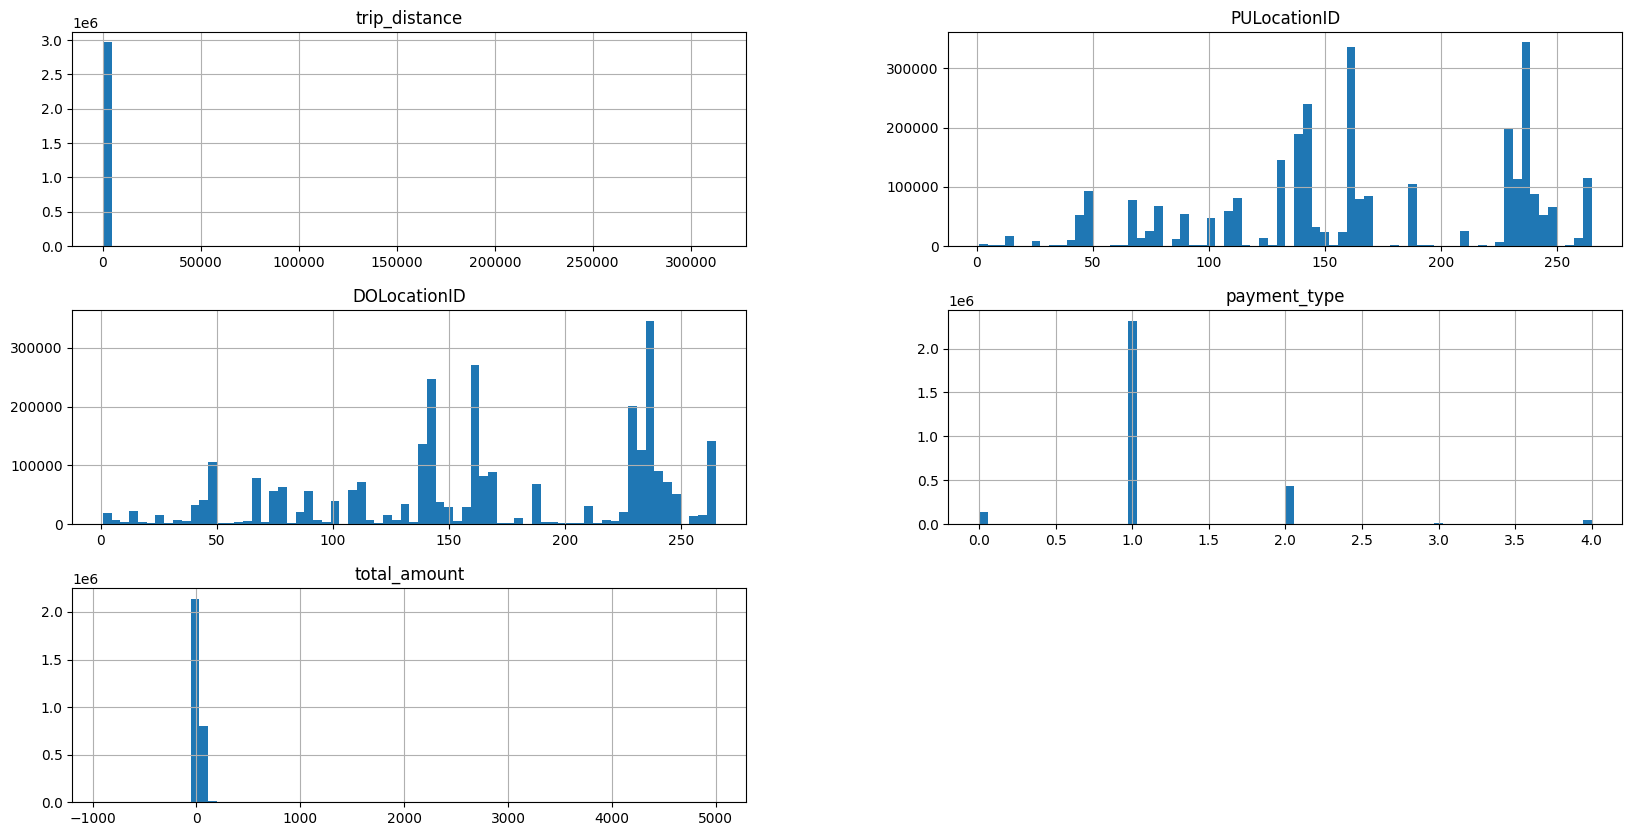

In [17]:
taxi_data.hist(figsize=(20,10), bins=70)


In [18]:
print(taxi_data.dtypes)


tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count           object
trip_distance            float64
RatecodeID                object
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object


In [19]:
taxi_data["passenger_count"] = pd.to_numeric(taxi_data["passenger_count"], errors="coerce")


In [20]:
print(taxi_data.dtypes)


tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID                object
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object


array([[<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>],
       [<Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

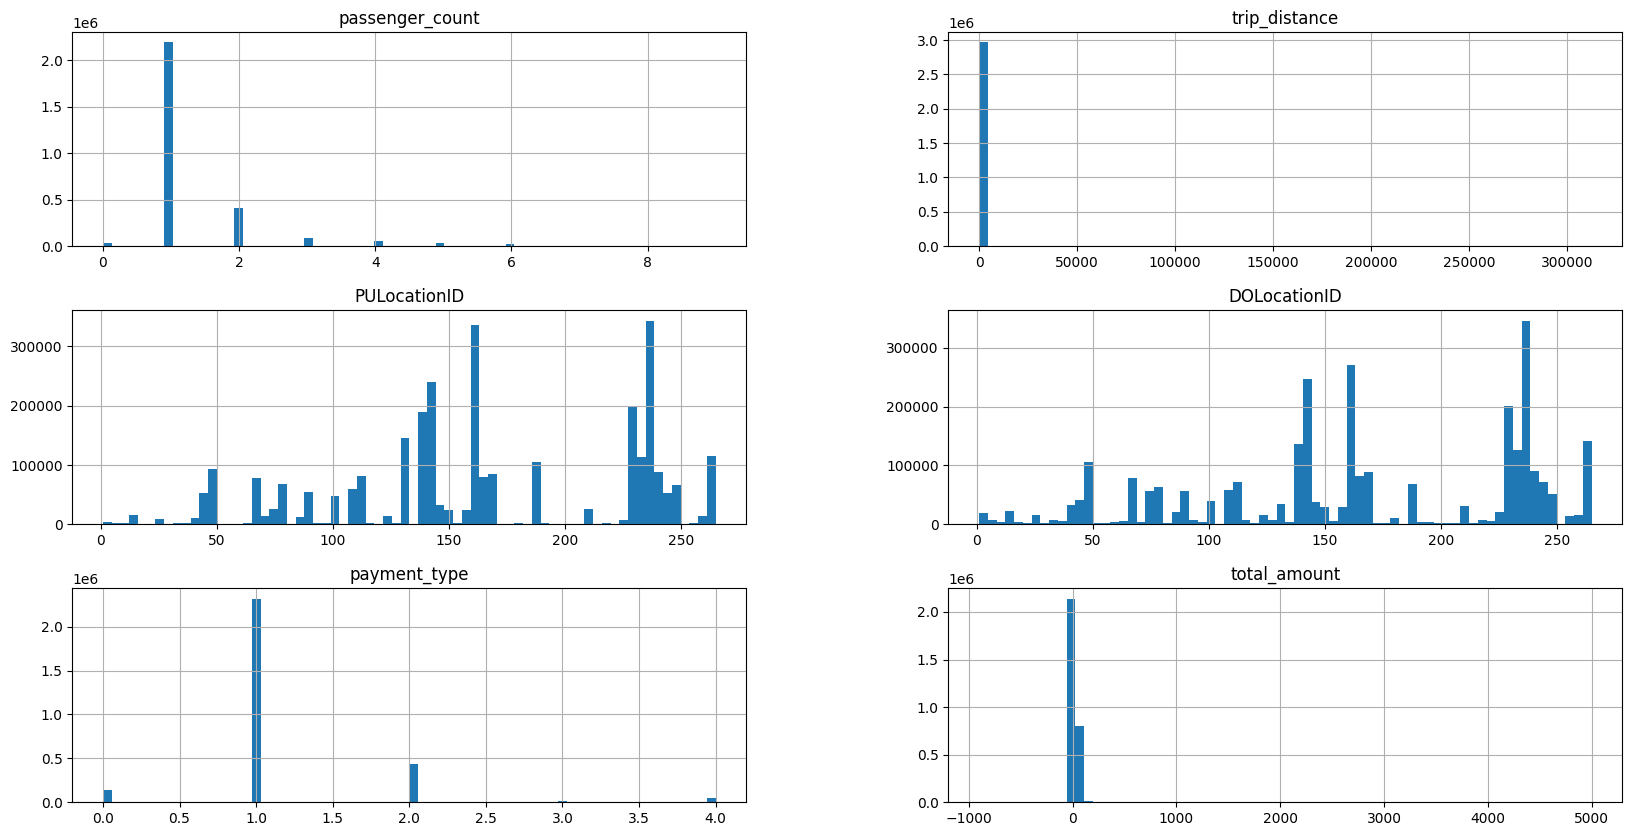

In [21]:
taxi_data.hist(figsize=(20,10), bins=70)


In [22]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1     2663350
\N     140162
2       98713
99      28663
5       19410
3        7954
4        6365
6           7
Name: count, dtype: int64

so we need to delete the /N 

#### Now lets check the total amount - as this is what we care about 

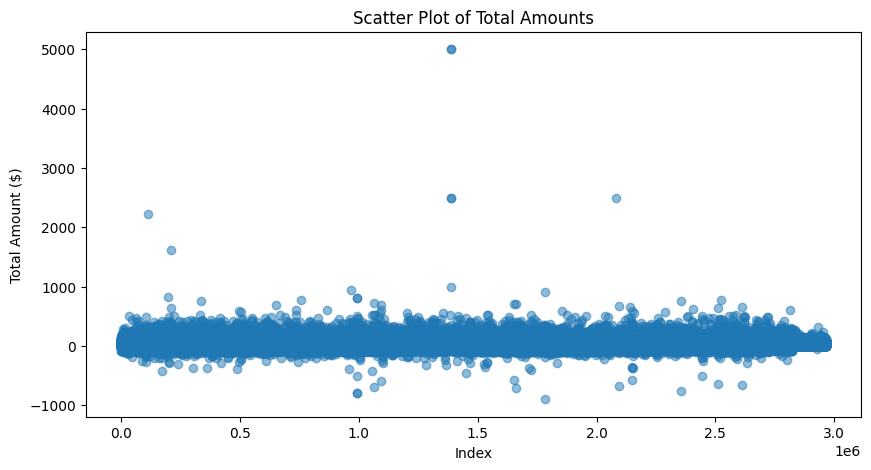

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(taxi_data.index, taxi_data['total_amount'], alpha=0.5) 
plt.xlabel("Index")
plt.ylabel("Total Amount ($)")
plt.title("Scatter Plot of Total Amounts")
plt.show()

ok....
need to find out why there are negative and zero values. also a taxi drive is not going to cost 5000$

In [26]:
print(taxi_data[taxi_data['total_amount']<0].shape)
print(taxi_data[taxi_data['total_amount']==0].shape)

(35504, 9)
(416, 9)


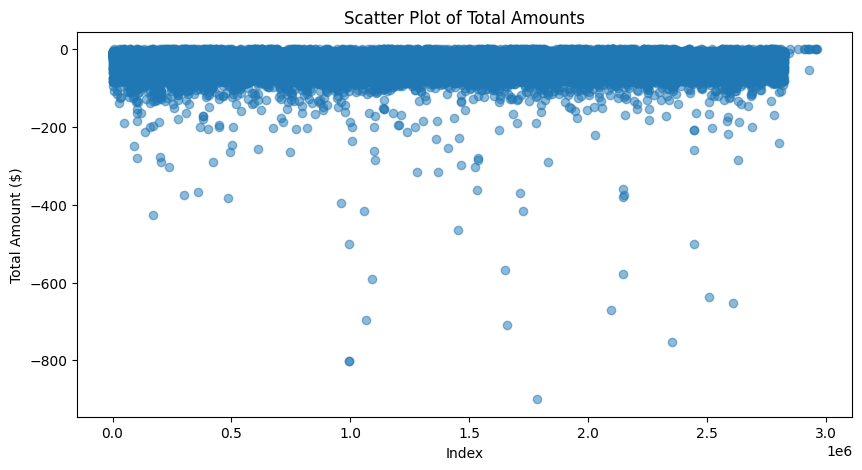

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(taxi_data.index[taxi_data['total_amount']<=0], taxi_data['total_amount'][taxi_data['total_amount']<=0], alpha=0.5) 
plt.xlabel("Index")
plt.ylabel("Total Amount ($)")
plt.title("Scatter Plot of Total Amounts")
plt.show()

In [28]:
taxi_data[taxi_data['total_amount']<=0].head()


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
18,2024-01-13 03:39:41.000000,2024-01-13 03:59:26.000000,1.0,3.61,1,48,145,4,-20.18
102,2024-01-13 03:04:52.000000,2024-01-13 03:08:22.000000,4.0,0.35,1,230,48,4,-10.10
166,2024-01-13 03:30:09.000000,2024-01-13 03:31:44.000000,2.0,0.04,1,141,141,4,-8.70
184,2024-01-13 03:39:11.000000,2024-01-13 04:02:41.000000,1.0,10.82,1,230,241,4,-49.30
225,2024-01-13 03:59:41.000000,2024-01-13 04:26:35.000000,1.0,1.69,1,141,237,4,-27.60


In [29]:
taxi_data[taxi_data['total_amount']<=0]['payment_type'].value_counts()


payment_type
4    21534
2     8391
3     5824
1      158
0       13
Name: count, dtype: int64

<Axes: >

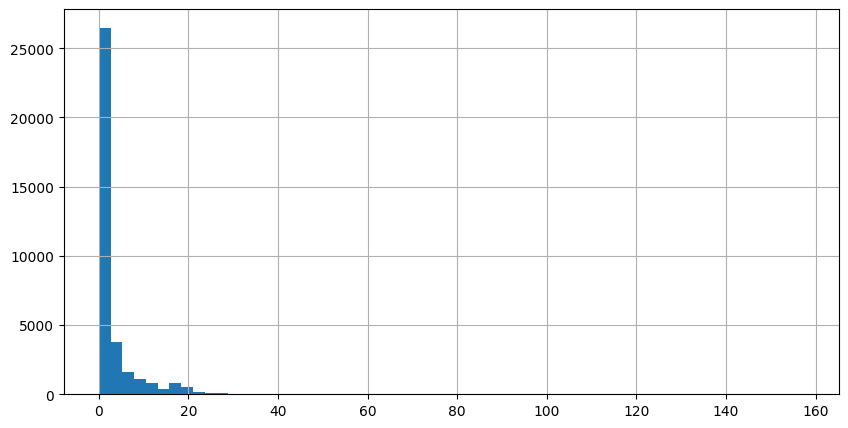

In [30]:
taxi_data[taxi_data['total_amount']<=0]['trip_distance'].hist(bins=60, figsize=(10,5))


so we can kinda understand that either those trips were really short or maybe there was a problem as they most have payment type 4 which is dispute... now for large total amount

In [33]:
print(taxi_data[taxi_data['total_amount']>100].shape)
print(taxi_data[taxi_data['total_amount']>200].shape)
print(taxi_data[taxi_data['total_amount']>250].shape)
print(taxi_data[taxi_data['total_amount']>300].shape)
print(taxi_data[taxi_data['total_amount']>400].shape)
print(taxi_data[taxi_data['total_amount']>500].shape)


(39976, 9)
(2005, 9)
(952, 9)
(525, 9)
(179, 9)
(62, 9)


so above 100 is common but above 250 - not so much 

In [32]:
taxi_data['total_amount'].mean()


np.float64(26.801504770925415)

## 2. Data cleaning and preparation


In [34]:
taxi_filtered_data = taxi_data[taxi_data['RatecodeID'] != r"\N"]
taxi_filtered_data = taxi_filtered_data[(taxi_filtered_data['total_amount'] < 250)&(taxi_filtered_data['total_amount'] >=0)]

In [36]:
taxi_data.shape

(2964624, 9)

In [37]:
taxi_filtered_data.shape

(2788009, 9)

In [40]:
taxi_filtered_data.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID                object
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [41]:
taxi_filtered_data.isna().sum()


tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

Great! our data seemes better now, we shoukd make it ready for our models.
one think we shoulsd fix - without harming the original data, is to use the datetime pandas data frame/

In [42]:
taxi_prepered_data = taxi_filtered_data.copy()

In [43]:
taxi_prepered_data.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID                object
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [51]:
taxi_prepered_data["tpep_pickup_datetime"] = pd.to_datetime(
    taxi_prepered_data["tpep_pickup_datetime"], errors="coerce")

taxi_prepered_data["tpep_dropoff_datetime"] = pd.to_datetime(
    taxi_prepered_data["tpep_dropoff_datetime"], errors="coerce")

In [50]:
taxi_prepered_data.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

only thing left to change - the location id's and payment type are int64, but the do not have a order - they are just keys, so we shound change this to strings so our model wont get confused

In [54]:
cols_to_convert = ["PULocationID", "DOLocationID", "payment_type"]
taxi_prepered_data[cols_to_convert] = taxi_prepered_data[cols_to_convert].astype(str)

In [55]:
taxi_prepered_data.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [56]:
taxi_prepered_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-13 03:18:09,2024-01-13 03:24:37,1.0,2.31,1,48,68,1,19.68
1,2024-01-13 03:52:58,2024-01-13 04:01:18,1.0,2.61,1,231,164,1,20.50
2,2024-01-13 03:26:02,2024-01-13 03:34:43,1.0,1.79,1,90,233,1,19.68
3,2024-01-13 03:53:44,2024-01-13 04:10:56,1.0,6.58,1,141,244,1,39.00
4,2024-01-13 02:58:28,2024-01-13 03:14:33,1.0,3.40,1,79,246,1,28.08


Now,lets split the date types so i we can access date,year,month,day,hour straight forward

In [57]:
taxi_prepered_data["trip_date"] = taxi_prepered_data["tpep_pickup_datetime"].dt.date
taxi_prepered_data["trip_year"] = taxi_prepered_data["tpep_pickup_datetime"].dt.year
taxi_prepered_data["trip_month"] = taxi_prepered_data["tpep_pickup_datetime"].dt.month
taxi_prepered_data["trip_day"] = taxi_prepered_data["tpep_pickup_datetime"].dt.day
taxi_prepered_data["trip_hour"] = taxi_prepered_data["tpep_pickup_datetime"].dt.hour

In [58]:
taxi_prepered_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,trip_date,trip_year,trip_month,trip_day,trip_hour
0,2024-01-13 03:18:09,2024-01-13 03:24:37,1.0,2.31,1,48,68,1,19.68,2024-01-13,2024,1,13,3
1,2024-01-13 03:52:58,2024-01-13 04:01:18,1.0,2.61,1,231,164,1,20.50,2024-01-13,2024,1,13,3
2,2024-01-13 03:26:02,2024-01-13 03:34:43,1.0,1.79,1,90,233,1,19.68,2024-01-13,2024,1,13,3
3,2024-01-13 03:53:44,2024-01-13 04:10:56,1.0,6.58,1,141,244,1,39.00,2024-01-13,2024,1,13,3
4,2024-01-13 02:58:28,2024-01-13 03:14:33,1.0,3.40,1,79,246,1,28.08,2024-01-13,2024,1,13,2


now we can check if there are some dates that arent January 2024

In [60]:
print(taxi_prepered_data[taxi_prepered_data['trip_month']!=1].shape)
print(taxi_prepered_data[taxi_prepered_data['trip_year']!=2024].shape)

(14, 14)
(14, 14)


In [62]:
print(taxi_prepered_data[taxi_prepered_data['trip_month']!=1])
print(taxi_prepered_data[taxi_prepered_data['trip_year']!=2024])

        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
131074   2023-12-31 23:56:46   2024-01-01 00:12:06              2.0   
131187   2023-12-31 23:39:17   2023-12-31 23:42:00              2.0   
131571   2023-12-31 23:41:02   2023-12-31 23:48:03              1.0   
133028   2023-12-31 23:57:17   2024-01-01 00:01:50              1.0   
133433   2023-12-31 23:56:45   2024-01-01 00:00:28              1.0   
133803   2023-12-31 23:49:12   2024-01-01 00:04:32              1.0   
133994   2023-12-31 23:47:28   2023-12-31 23:57:07              2.0   
134955   2023-12-31 23:58:35   2024-01-01 00:13:06              6.0   
134960   2023-12-31 23:58:37   2024-01-01 00:08:37              2.0   
139446   2023-12-31 23:54:27   2024-01-01 00:13:12              1.0   
183938   2002-12-31 22:59:39   2002-12-31 23:05:41              1.0   
2822633  2024-02-01 00:00:39   2024-02-01 00:12:08              5.0   
2822693  2024-02-01 00:00:17   2024-02-01 00:20:13              1.0   
282302

most of those trips either ended on 1/2024 or are just a mistake. lets delete themm

In [66]:
taxi_prepered_data = taxi_prepered_data[(taxi_prepered_data["trip_month"] == 1) & (taxi_prepered_data["trip_year"] == 2024)]


In [67]:
taxi_prepered_data.shape

(2787992, 14)

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'trip_year'}>],
       [<Axes: title={'center': 'trip_month'}>,
        <Axes: title={'center': 'trip_day'}>,
        <Axes: title={'center': 'trip_hour'}>]], dtype=object)

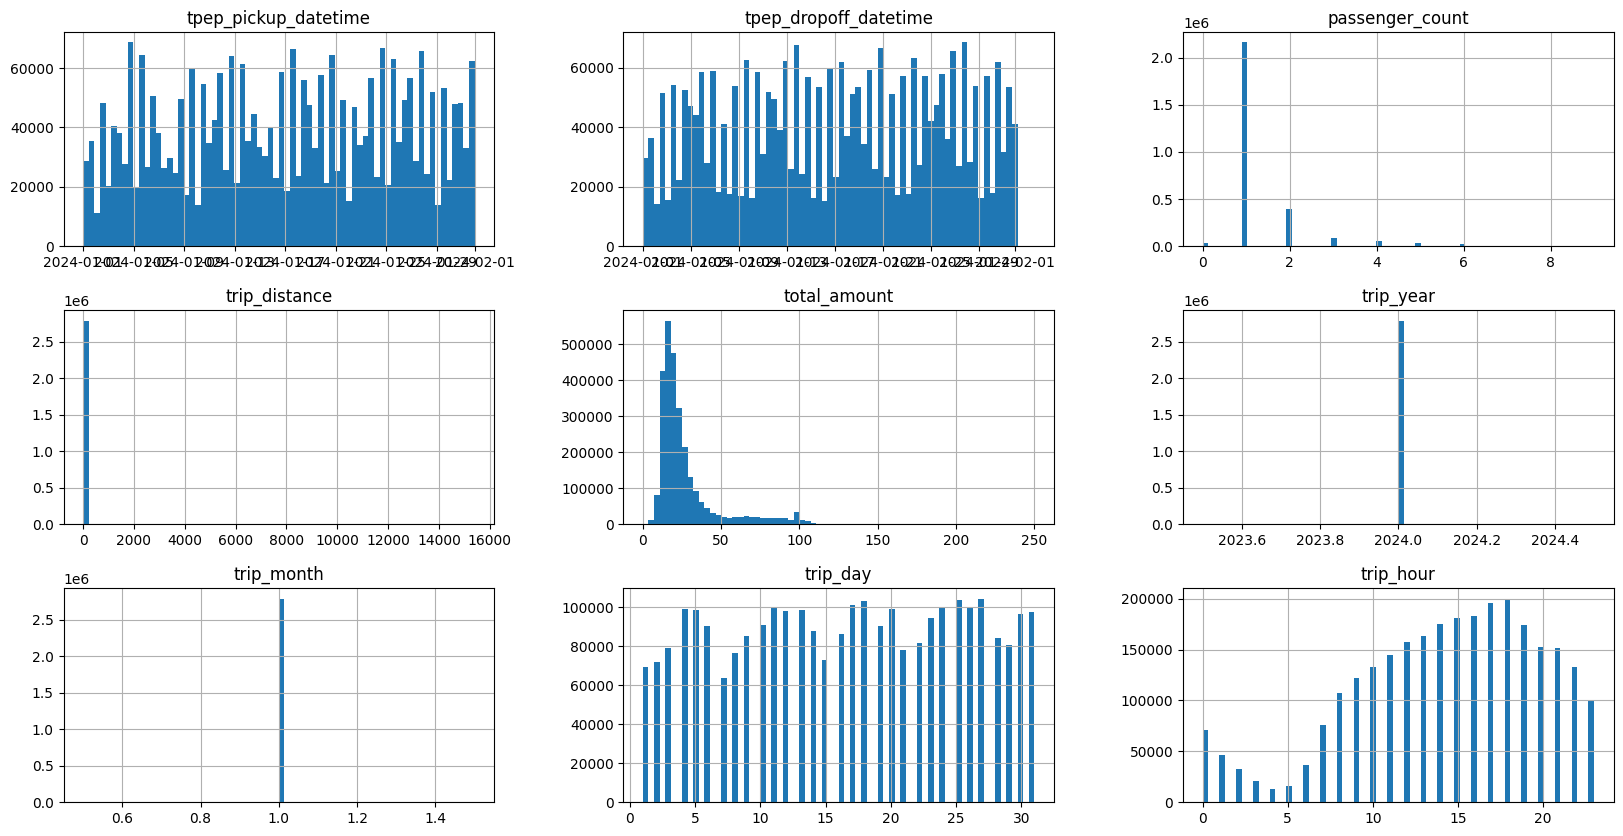

In [68]:
taxi_prepered_data.hist(figsize=(20,10), bins=70)

In [70]:
taxi_prepered_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,trip_date,trip_year,trip_month,trip_day,trip_hour
0,2024-01-13 03:18:09,2024-01-13 03:24:37,1.0,2.31,1,48,68,1,19.68,2024-01-13,2024,1,13,3
1,2024-01-13 03:52:58,2024-01-13 04:01:18,1.0,2.61,1,231,164,1,20.50,2024-01-13,2024,1,13,3
2,2024-01-13 03:26:02,2024-01-13 03:34:43,1.0,1.79,1,90,233,1,19.68,2024-01-13,2024,1,13,3
3,2024-01-13 03:53:44,2024-01-13 04:10:56,1.0,6.58,1,141,244,1,39.00,2024-01-13,2024,1,13,3
4,2024-01-13 02:58:28,2024-01-13 03:14:33,1.0,3.40,1,79,246,1,28.08,2024-01-13,2024,1,13,2


#### looks great! 
now lets think what information is really important for our model.
##### recall that our goal is to estimate the avarage amount of money spent at each region for given day and hour.
so first, as the driver does not know the trip distance and drop off location when a costumer get on the taxi - we cant use this.
also, passenger_count and pyment type does not effect the payment - so our model wont need it.


In [72]:
needed_cols = ["RatecodeID", "PULocationID", "total_amount", "trip_date", "trip_year", "trip_month", "trip_day", "trip_hour"]

In [74]:
taxi_prepered_data[needed_cols].head(10)

,RatecodeID,PULocationID,total_amount,trip_date,trip_year,trip_month,trip_day,trip_hour
0,1,48,19.68,2024-01-13,2024,1,13,3
1,1,231,20.50,2024-01-13,2024,1,13,3
2,1,90,19.68,2024-01-13,2024,1,13,3
3,1,141,39.00,2024-01-13,2024,1,13,3
4,1,79,28.08,2024-01-13,2024,1,13,2
5,1,140,19.20,2024-01-13,2024,1,13,3
6,3,48,124.18,2024-01-13,2024,1,13,3
7,1,249,18.00,2024-01-13,2024,1,13,3
8,1,164,40.68,2024-01-13,2024,1,13,3
9,1,90,56.54,2024-01-13,2024,1,13,3


Now - we want to collect all rides at the same time and same location togther - as we care only about the avarages and we want our model to get the most explicit data. we also going to let go of RatecodeID because i think it is not effecting the total amount.

In [123]:
taxi_region_hour_avg.shape

(71986, 8)

In [232]:
needed_cols = ["PULocationID", "total_amount", "trip_date", "trip_year", "trip_month", "trip_day", "trip_hour"]
group_together_cols = ["PULocationID", "trip_date", "trip_year", "trip_month", "trip_day", "trip_hour"]

taxi_region_hour_avg = taxi_prepered_data[needed_cols].groupby(group_together_cols).mean()
taxi_region_hour_avg["#rides"] = taxi_prepered_data[needed_cols].groupby(group_together_cols).count()

In [234]:
taxi_region_hour_avg.head(10000)

total_amount  \
PULocationID trip_date  trip_year trip_month trip_day trip_hour                 
1            2024-01-01 2024      1          1        5            109.200000   
                                                      6             76.000000   
                                                      13           108.983333   
                                                      14            85.680000   
                                                      15           145.620000   
...                                                                       ...   
137          2024-01-28 2024      1          28       17            19.206500   
                                                      18            20.295128   
                                                      19            18.185000   
                                                      20            18.506000   
                                                      21            21.870000   

                                                                 #rides  
PULocationID trip_date  trip_year trip_month trip_day trip_hour          
1            2024-01-01 2024      1          1        5               1  
                                                      6               3  
                                                      13              3  
                                                      14              6  
                                                      15              2  
...                                                                 ...  
137          2024-01-28 2024      1          28       17             40  
                                                      18             39  
                                                      19             28  
                                                      20             25  
                                                      21             39  

[10000 rows x 2 columns]

Great! now for each pickup location and hour - we have the number of rides and the average payemnt for this kind of a ride 

array([[<Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': '#rides'}>]], dtype=object)

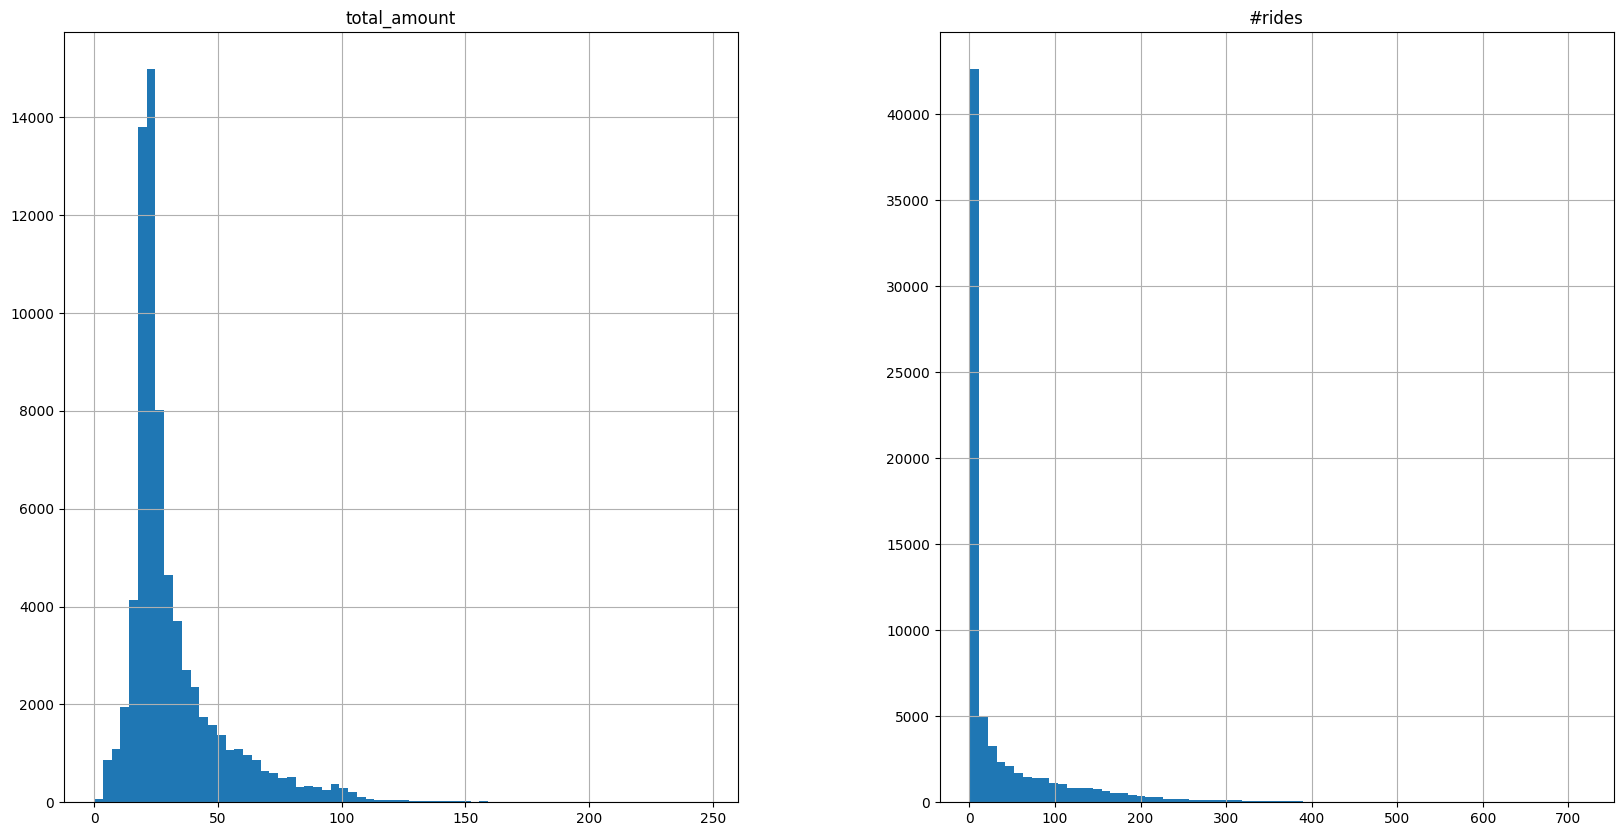

In [235]:
taxi_region_hour_avg.hist(figsize=(20,10), bins=70)

more then 300 rides in an hour is interesting - we will observe this later.

## 3. Benchmark model
Lets test our features on a simple model to find problems with our data

In [236]:
taxi_for_benchmark = taxi_region_hour_avg.copy().reset_index()

In [237]:
taxi_for_benchmark.shape

(71986, 8)

In [238]:
taxi_for_benchmark.dtypes

PULocationID     object
trip_date        object
trip_year         int32
trip_month        int32
trip_day          int32
trip_hour         int32
total_amount    float64
#rides            int64
dtype: object

In [268]:
taxi_for_benchmark.head()

,PULocationID,trip_date,trip_year,trip_month,trip_day,trip_hour,total_amount,#rides
0,1,2024-01-01,2024,1,1,5,109.200000,1
1,1,2024-01-01,2024,1,1,6,76.000000,3
2,1,2024-01-01,2024,1,1,13,108.983333,3
3,1,2024-01-01,2024,1,1,14,85.680000,6
4,1,2024-01-01,2024,1,1,15,145.620000,2


In [269]:
input_features_benchmark  =  ["PULocationID", "trip_month", "trip_day", "trip_hour"]
output_feature_benchmark  = 'total_amount'

#### train - test split

In [274]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 753.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 1.1 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 2.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 1.9 MB/s eta 0:00:0000:0100:01


In [276]:
from sklearn.model_selection import train_test_split

X_benchmark = taxi_for_benchmark[input_features_benchmark]
y_benchmark = taxi_for_benchmark[output_feature_benchmark]

X_benchmark = pd.get_dummies(X_benchmark)


X_train, X_test, y_train, y_test = train_test_split(X_benchmark, y_benchmark, test_size=0.33, random_state=42)


In [281]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(48230, 258) (23756, 258)
(48230,) (23756,)


#### Using a DecisionTreeRegressor 


In [283]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [285]:
#initializing & training
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [286]:
y_pred = tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rooted_mse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("rooted Mean Squared Error: ", rooted_mse)
print("Mean Absolute Error: ", mae)
print("r2 score: ", r2)

Mean Squared Error:  327.2637951812097
rooted Mean Squared Error:  18.090433803013394
Mean Absolute Error:  11.711594471308088
r2 score:  0.2348561000029311


### Visualizing

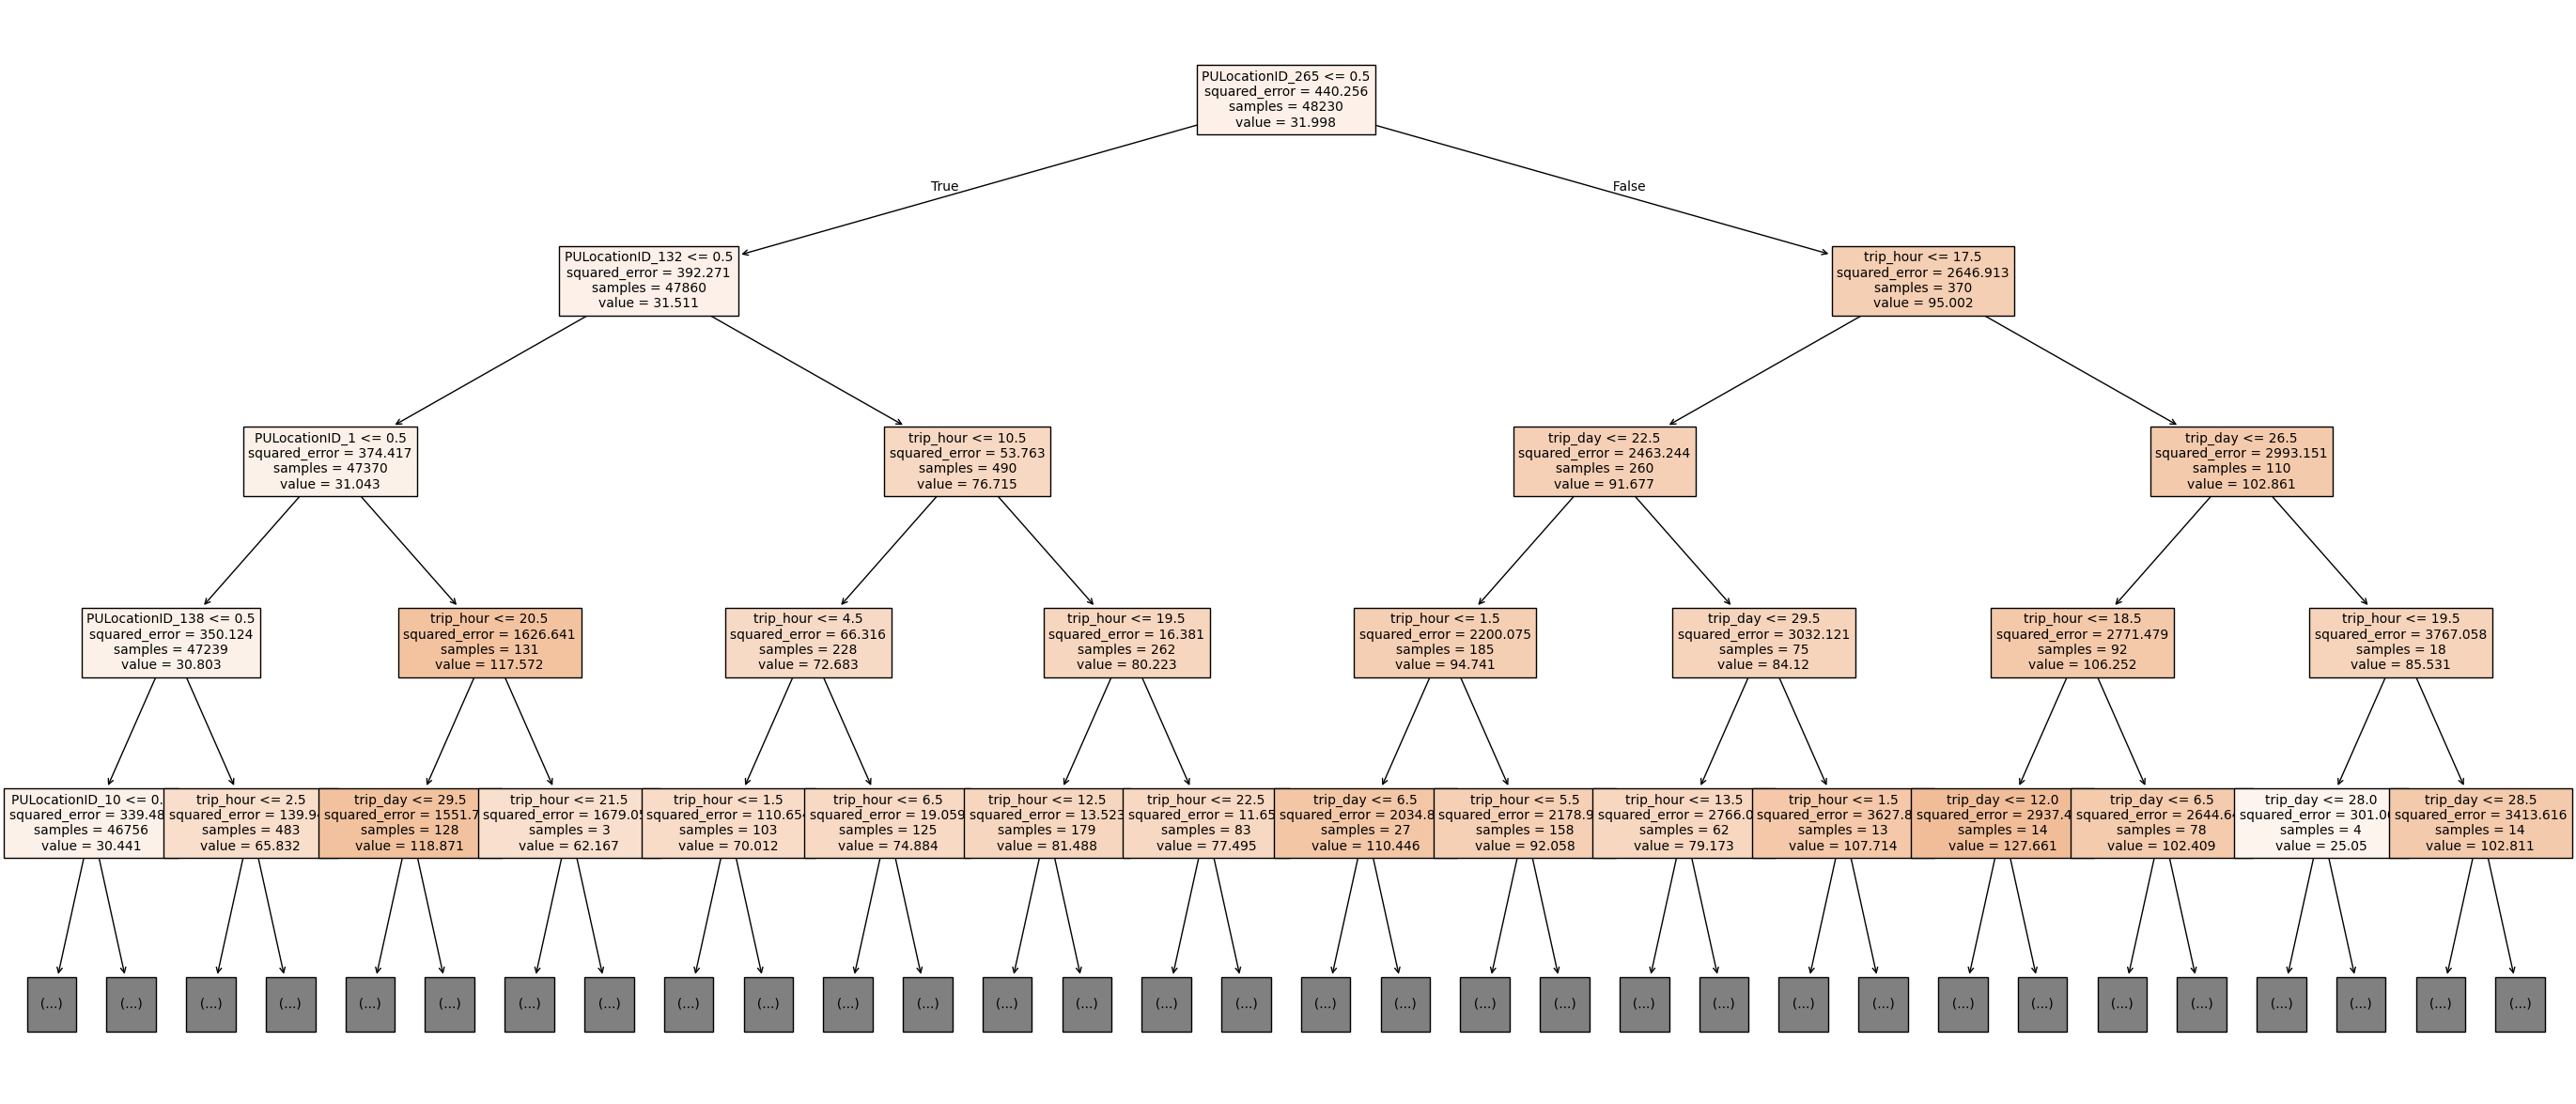

In [298]:
from sklearn.tree import plot_tree
plt.figure(figsize=(35,15))  # Set figure size
plot_tree(tree, filled=True, feature_names=X_train.columns, fontsize=10, max_depth=4)
plt.show()


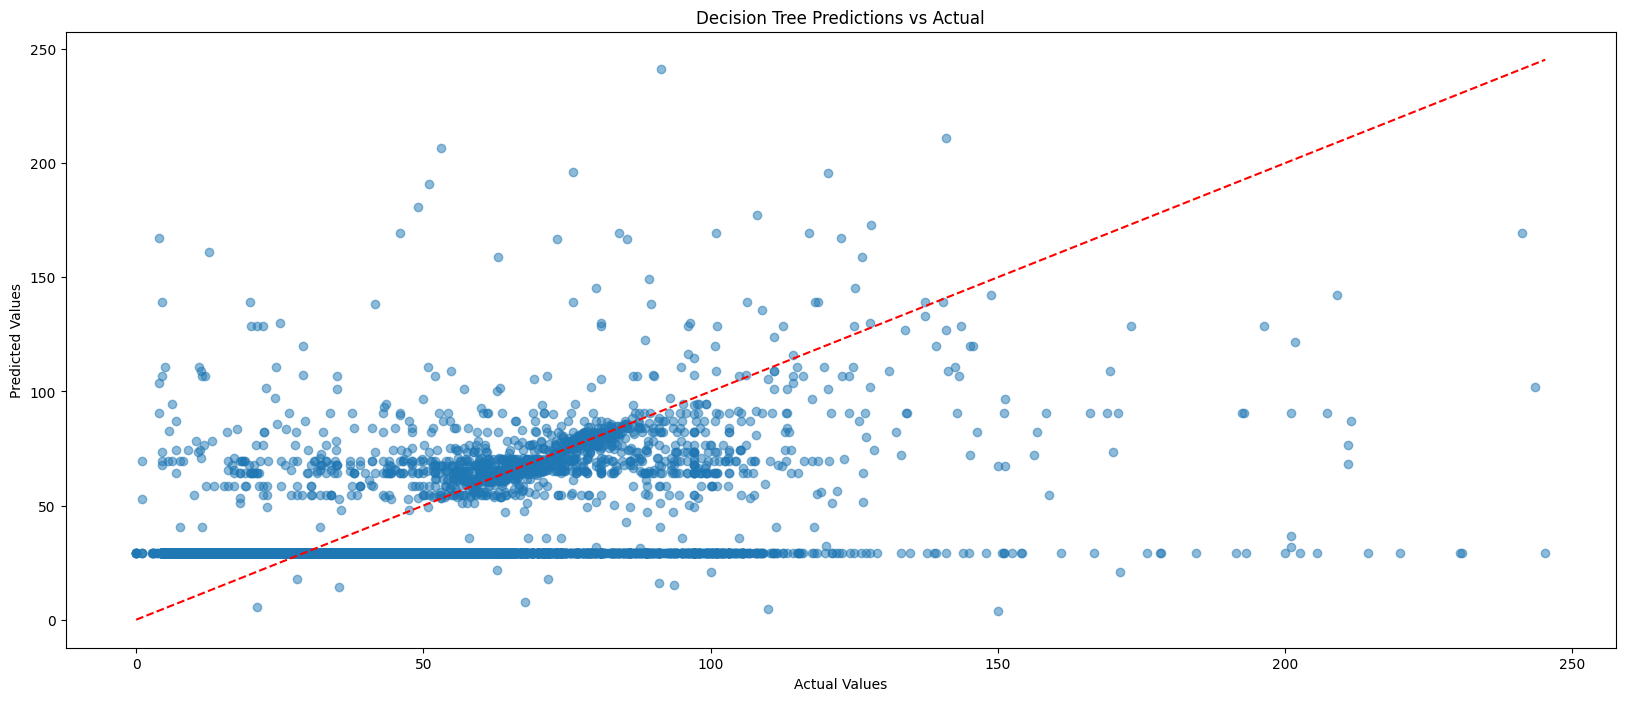

In [303]:
plt.figure(figsize=(20,8))
plt.scatter(y_test, y_pred, alpha=0.5)  # Scatter plot of actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Predictions vs Actual")
plt.show()


It seems not so good.....
maybe we are underfitting - lets try a deeper tree first

In [304]:
#new tree!!
tree2 = DecisionTreeRegressor(max_depth=20)
tree2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [305]:
y_pred2 = tree2.predict(X_test)

mse = mean_squared_error(y_test, y_pred2)
rooted_mse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print("Mean Squared Error: ", mse)
print("rooted Mean Squared Error: ", rooted_mse)
print("Mean Absolute Error: ", mae)
print("r2 score: ", r2)

Mean Squared Error:  346.4951666738617
rooted Mean Squared Error:  18.614380641693714
Mean Absolute Error:  11.547642366462345
r2 score:  0.18989308605868316


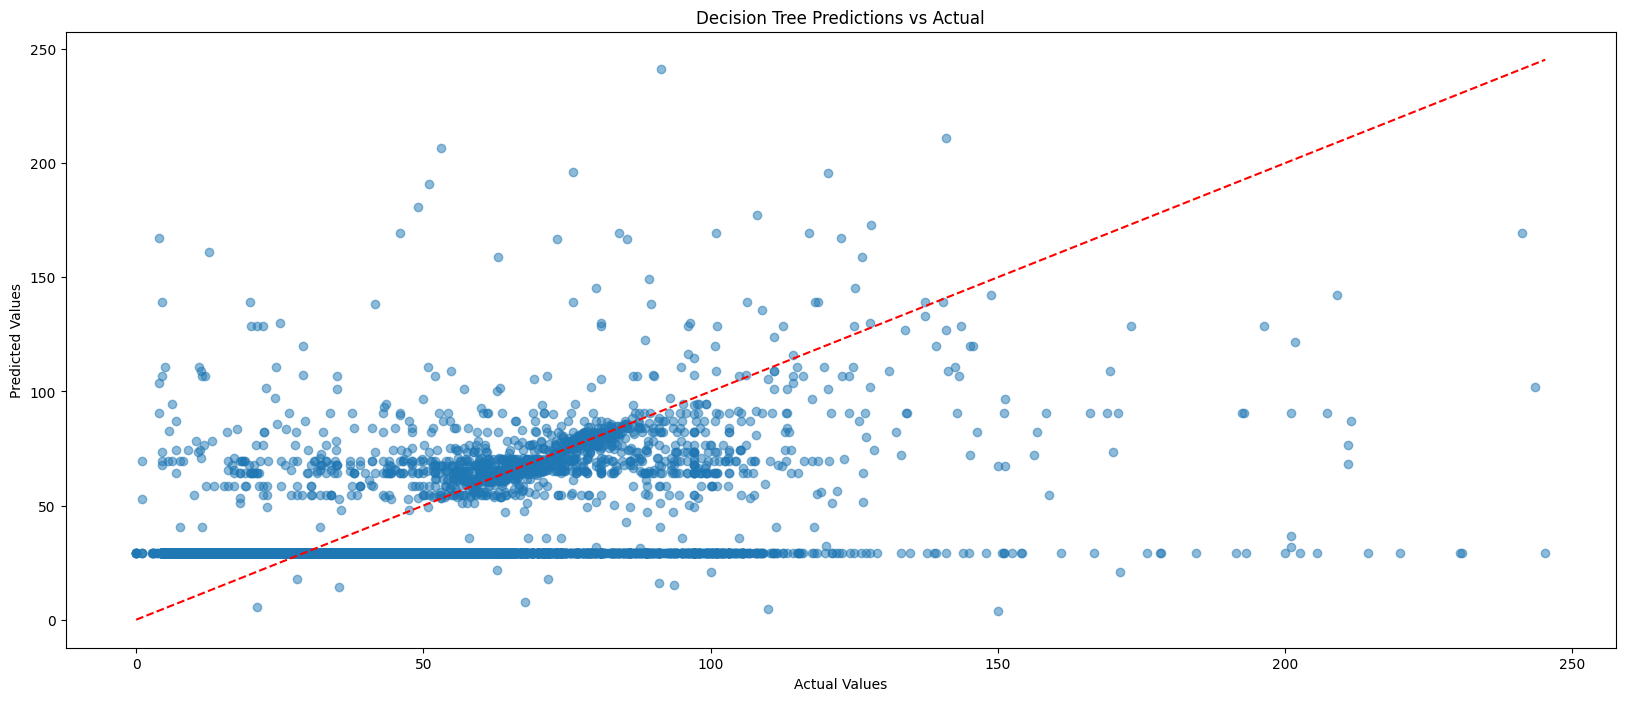

In [306]:
plt.figure(figsize=(20,8))
plt.scatter(y_test, y_pred, alpha=0.5)  # Scatter plot of actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Predictions vs Actual")
plt.show()


Ok... it is still unfortunate - I don't think it is overfitting now... we need to understand why it is predicting such small numbers.
We already deleted expensive rides so I guess we just need better features.

### tring to do something with the data

In [313]:
print(taxi_prepered_data[taxi_prepered_data['total_amount']<5].shape)
print(taxi_prepered_data[taxi_prepered_data['total_amount']<4].shape)
print(taxi_prepered_data[taxi_prepered_data['total_amount']<3].shape)
print(taxi_prepered_data[taxi_prepered_data['total_amount']<2].shape)
print(taxi_prepered_data[taxi_prepered_data['total_amount']<1].shape)
print(taxi_prepered_data[taxi_prepered_data['total_amount']<0.5].shape)
print(taxi_prepered_data[taxi_prepered_data['total_amount']<0.001].shape)

(3765, 14)
(789, 14)
(744, 14)
(689, 14)
(409, 14)
(409, 14)
(405, 14)


OK  - lets delete anything under 1 dollar - its a weird ride....

In [315]:
taxi_prepered_data = taxi_prepered_data[(taxi_prepered_data['total_amount'] > 1)]

In [316]:
needed_cols = ["PULocationID", "total_amount", "trip_date", "trip_year", "trip_month", "trip_day", "trip_hour"]
group_together_cols = ["PULocationID", "trip_date", "trip_year", "trip_month", "trip_day", "trip_hour"]

taxi_region_hour_avg = taxi_prepered_data[needed_cols].groupby(group_together_cols).mean()
taxi_region_hour_avg["#rides"] = taxi_prepered_data[needed_cols].groupby(group_together_cols).count()

In [318]:
taxi_region_hour_avg.head(1000)

total_amount  \
PULocationID trip_date  trip_year trip_month trip_day trip_hour                 
1            2024-01-01 2024      1          1        5            109.200000   
                                                      6             76.000000   
                                                      13           108.983333   
                                                      14            85.680000   
                                                      15           145.620000   
...                                                                       ...   
100          2024-01-15 2024      1          15       22            20.664200   
                                                      23            20.598056   
             2024-01-16 2024      1          16       0             24.387500   
                                                      1             25.182500   
                                                      2             37.076667   

                                                                 #rides  
PULocationID trip_date  trip_year trip_month trip_day trip_hour          
1            2024-01-01 2024      1          1        5               1  
                                                      6               3  
                                                      13              3  
                                                      14              6  
                                                      15              2  
...                                                                 ...  
100          2024-01-15 2024      1          15       22             50  
                                                      23             36  
             2024-01-16 2024      1          16       0               8  
                                                      1               8  
                                                      2               6  

[1000 rows x 2 columns]

Now - lets add some time features.

In [321]:
taxi_with_new_features = taxi_region_hour_avg.copy()

In [328]:
taxi_with_new_features = taxi_with_new_features.reset_index()

In [334]:
taxi_with_new_features["trip_date"].dtype

dtype('O')

In [335]:
taxi_with_new_features["trip_date"] = pd.to_datetime(taxi_with_new_features["trip_date"])

In [336]:
taxi_with_new_features["trip_date"].dtype

dtype('<M8[ns]')

In [337]:
taxi_with_new_features["weekday"] = taxi_with_new_features["trip_date"].dt.weekday
taxi_with_new_features["is_weekend"] = taxi_with_new_features["weekday"] >= 5

In [343]:
taxi_with_new_features.head()

,PULocationID,trip_date,trip_year,trip_month,trip_day,trip_hour,total_amount,#rides,weekday,is_weekend
0,1,2024-01-01,2024,1,1,5,109.200000,1,0,False
1,1,2024-01-01,2024,1,1,6,76.000000,3,0,False
2,1,2024-01-01,2024,1,1,13,108.983333,3,0,False
3,1,2024-01-01,2024,1,1,14,85.680000,6,0,False
4,1,2024-01-01,2024,1,1,15,145.620000,2,0,False
...,...,...,...,...,...,...,...,...,...,...
71948,98,2024-01-30,2024,1,30,5,60.970000,2,1,False
71949,98,2024-01-31,2024,1,31,5,51.000000,1,2,False
71950,98,2024-01-31,2024,1,31,10,67.940000,1,2,False
71951,98,2024-01-31,2024,1,31,12,10.100000,1,2,False


In [345]:
print(taxi_with_new_features[taxi_with_new_features["is_weekend"]== True].shape)
print(taxi_with_new_features[taxi_with_new_features["is_weekend"]== False].shape)


(17303, 10)
(54650, 10)


In [349]:
#adding some cyclic hour features so that late night and early morning are close
taxi_with_new_features["sin_hour"] = np.sin(2 * np.pi * taxi_with_new_features["trip_hour"] / 24)
taxi_with_new_features["cos_hour"] = np.cos(2 * np.pi * taxi_with_new_features["trip_hour"] / 24)

In [350]:
taxi_with_new_features.head(10)

,PULocationID,trip_date,trip_year,trip_month,trip_day,trip_hour,total_amount,#rides,weekday,is_weekend,sin_hour,cos_hour
0,1,2024-01-01,2024,1,1,5,109.200000,1,0,False,0.965926,2.588190e-01
1,1,2024-01-01,2024,1,1,6,76.000000,3,0,False,1.000000,6.123234e-17
2,1,2024-01-01,2024,1,1,13,108.983333,3,0,False,-0.258819,-9.659258e-01
3,1,2024-01-01,2024,1,1,14,85.680000,6,0,False,-0.500000,-8.660254e-01
4,1,2024-01-01,2024,1,1,15,145.620000,2,0,False,-0.707107,-7.071068e-01
5,1,2024-01-01,2024,1,1,16,142.800000,1,0,False,-0.866025,-5.000000e-01
6,1,2024-01-01,2024,1,1,17,100.812500,4,0,False,-0.965926,-2.588190e-01
7,1,2024-01-02,2024,1,2,5,124.700000,1,1,False,0.965926,2.588190e-01
8,1,2024-01-02,2024,1,2,6,145.200000,1,1,False,1.000000,6.123234e-17
9,1,2024-01-02,2024,1,2,7,84.970000,2,1,False,0.965926,-2.588190e-01
